<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_raw = ''
sat_file = 'sat_scores.csv'
with open (sat_file,'r') as f:
    sat_raw = f.read()
f.close()

In [3]:
sat_data = [(col.split(',')) for col in sat_raw.split('\n')]
sat_header = sat_data[0]
sat_rest = sat_data[1:-1]

sat_dict={}
for index, values in enumerate(sat_header):
    temp = []
    for state_sat in sat_rest:
        try:
            temp.append(float(state_sat[index]))
        except ValueError:
            temp.append(state_sat[index])
    sat_dict[values] = temp

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [4]:
# with pandas .read_csv()
data_raw = pd.read_csv('sat_scores.csv')
data_raw = pd.DataFrame(data_raw)

In [5]:
# with DataFrame obj with SAT dictionary:
df_sat = pd.DataFrame(sat_dict) 
display (df_sat.dtypes)

Math      float64
Rate      float64
State      object
Verbal    float64
dtype: object

### Shaun's Comments
Order the column are different. DataFrame created under pandas converted all numbers column into int64 while DataFrame created by dictionary can be determined by user's preference, for which I have converted them to float64.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
data_raw.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
data_raw.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [8]:
import seaborn as sns

In [9]:
data_raw.set_index('State')

,Rate,Verbal,Math
State,,,
CT,82,509,510
NJ,81,499,513
MA,79,511,515
NY,77,495,505
NH,72,520,516
RI,71,501,499
PA,71,500,499
VT,69,511,506
ME,69,506,500


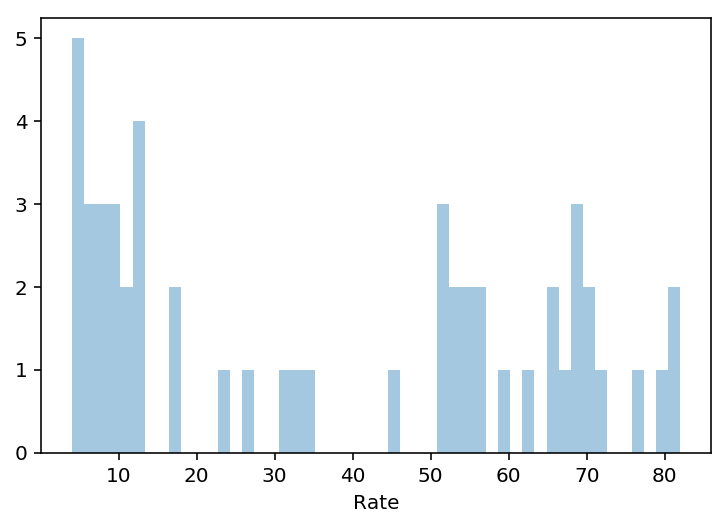

In [10]:
sns.distplot(data_raw['Rate'],kde=False,bins=50)


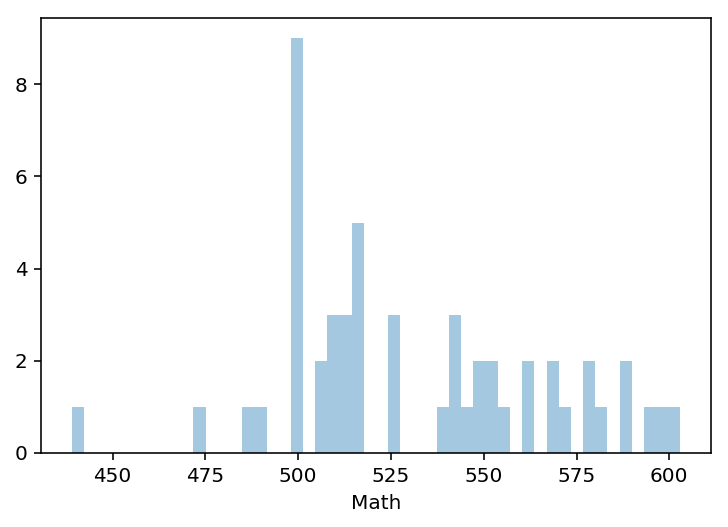

In [11]:
sns.distplot(data_raw['Math'], kde=False, bins=50)

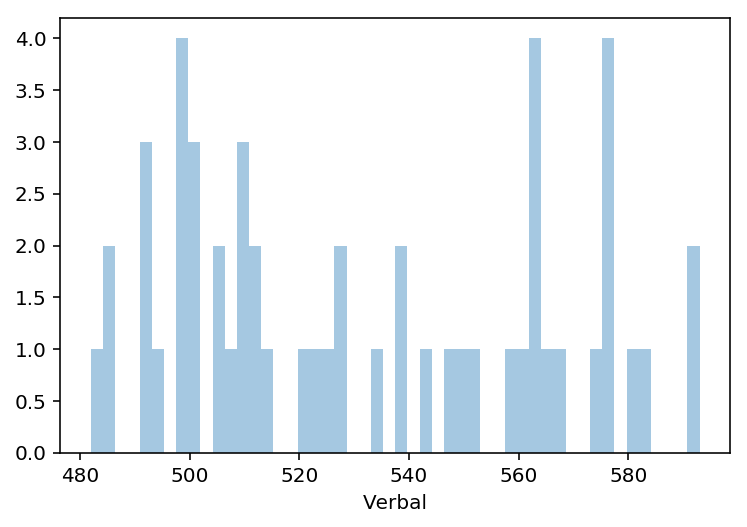

In [12]:
sns.distplot(data_raw['Verbal'], kde=False, bins=50)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

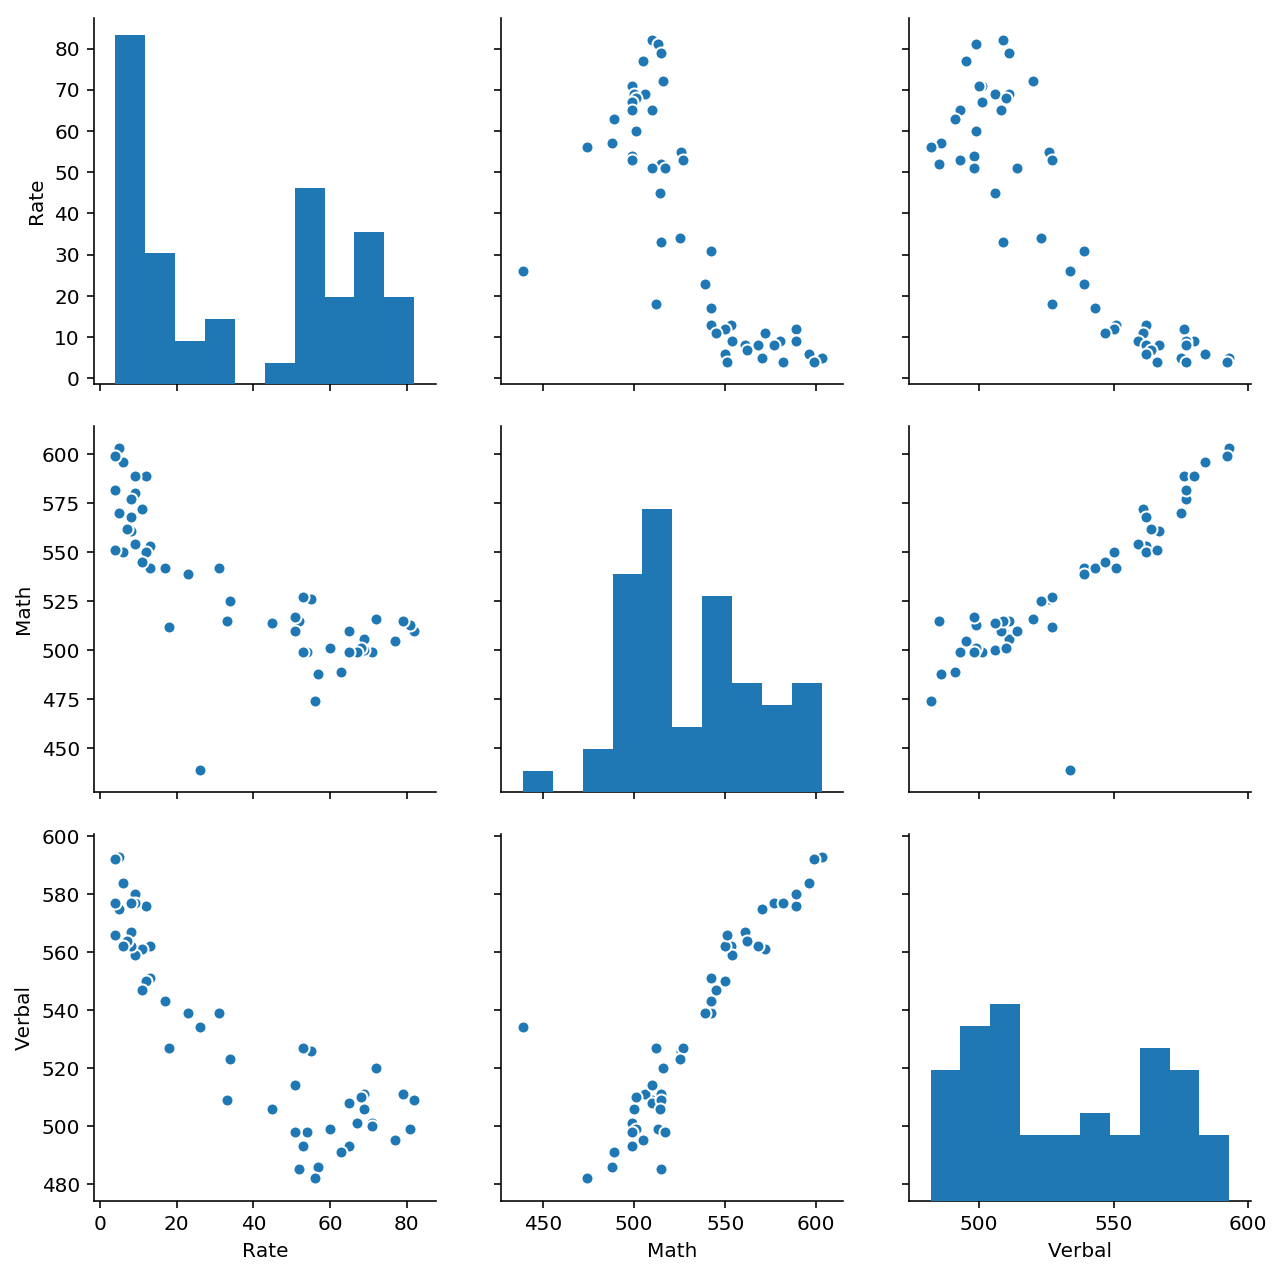

In [13]:
sns.pairplot(data_raw[['Rate','Math','Verbal']],size=3)

### Shaun's comment
There is a direct corelation between Math and Verbal scores. Higher Math scorer are also higher Verbal scorer


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0,0.5,u'Total Score')

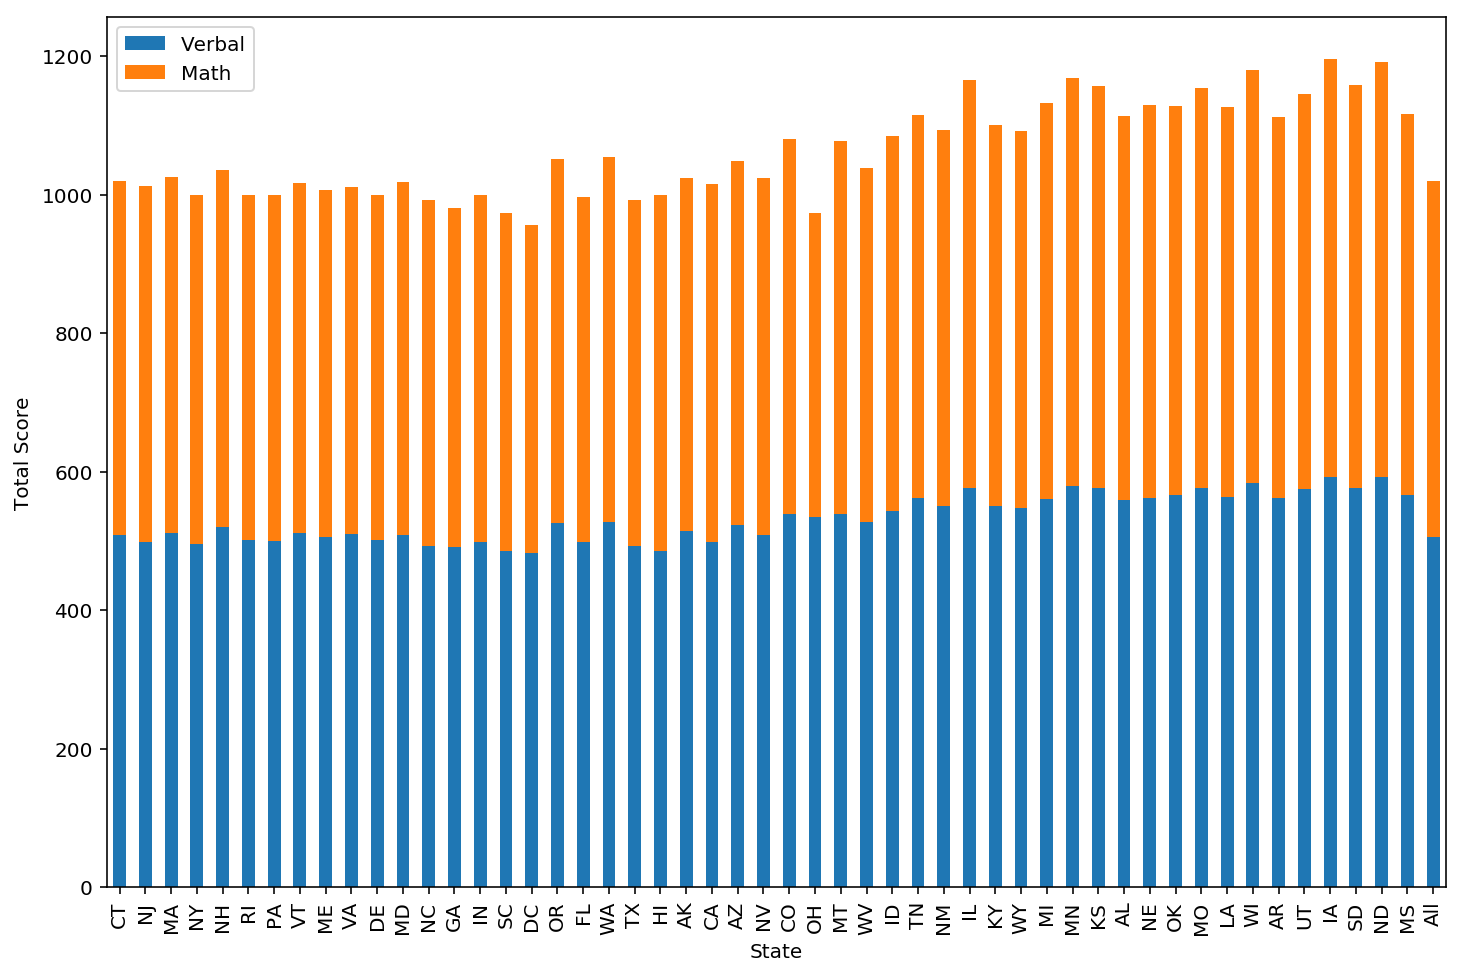

In [14]:
data_raw[['Verbal','Math']].plot.bar(stacked=True,x=data_raw['State'],figsize=(12,8)).set_ylabel('Total Score')


### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

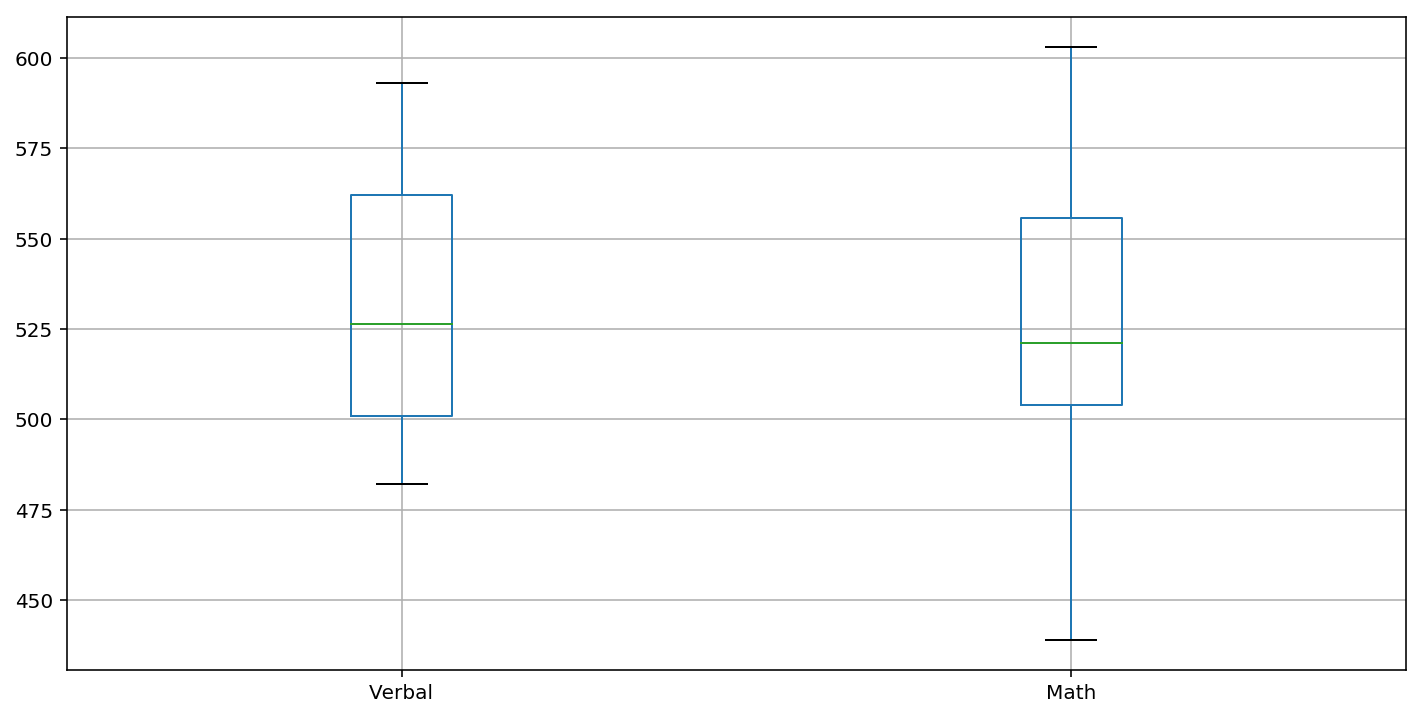

In [15]:
data_raw[['Verbal','Math']].plot(kind='box',figsize=(12,6),grid=True)


### Shaun's comment
Boxplot allows you to know if there's any outlier. From a single boxplot it is able to tell you the the range of where 50% population is within as well as the max and min count.
There is 1 outlier on for both Verbal and Math dataset
Rate refers to entry counts of SAT scores of the 2 tests. Including Rate will increase the 'size' of the box plot. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


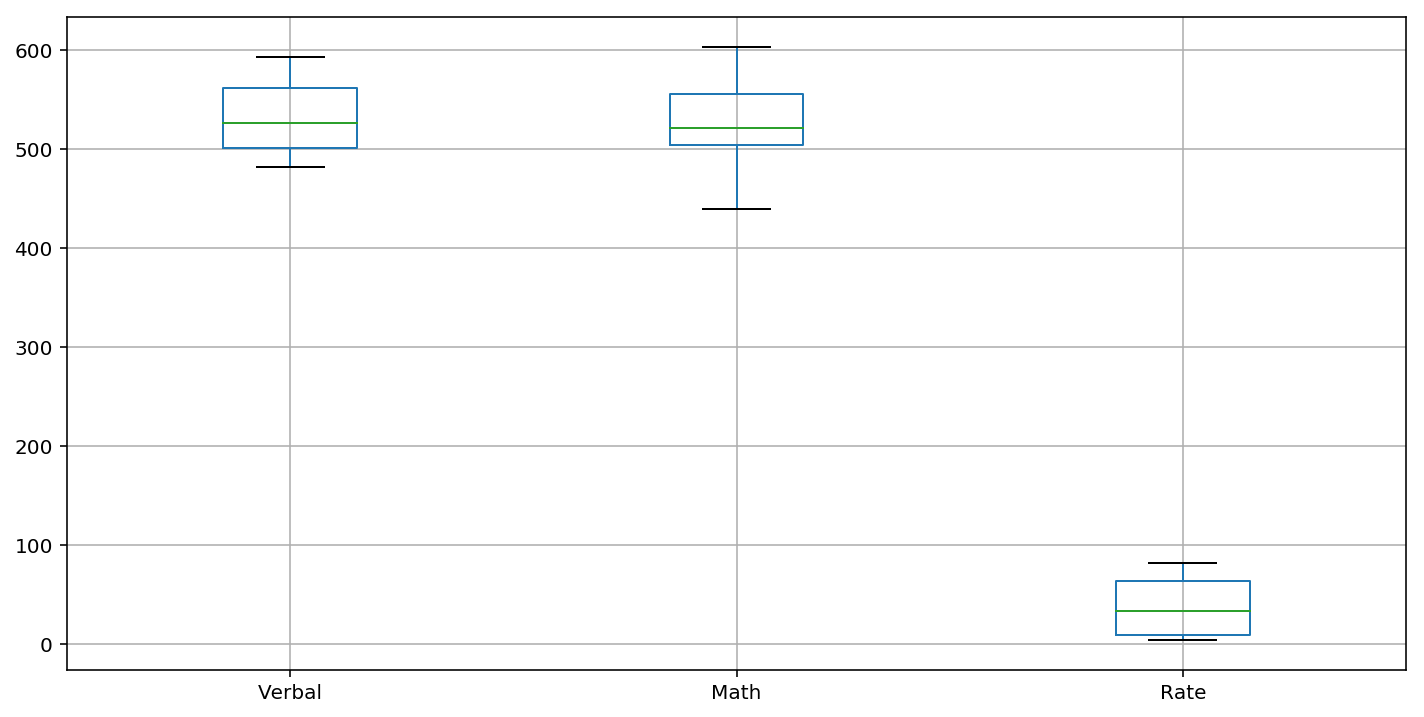

In [16]:
data_raw[['Verbal','Math','Rate']].plot(kind='box',figsize=(12,6),grid=True)

### Shaun's comment
Scale of Verbal and Math versus Rate is different

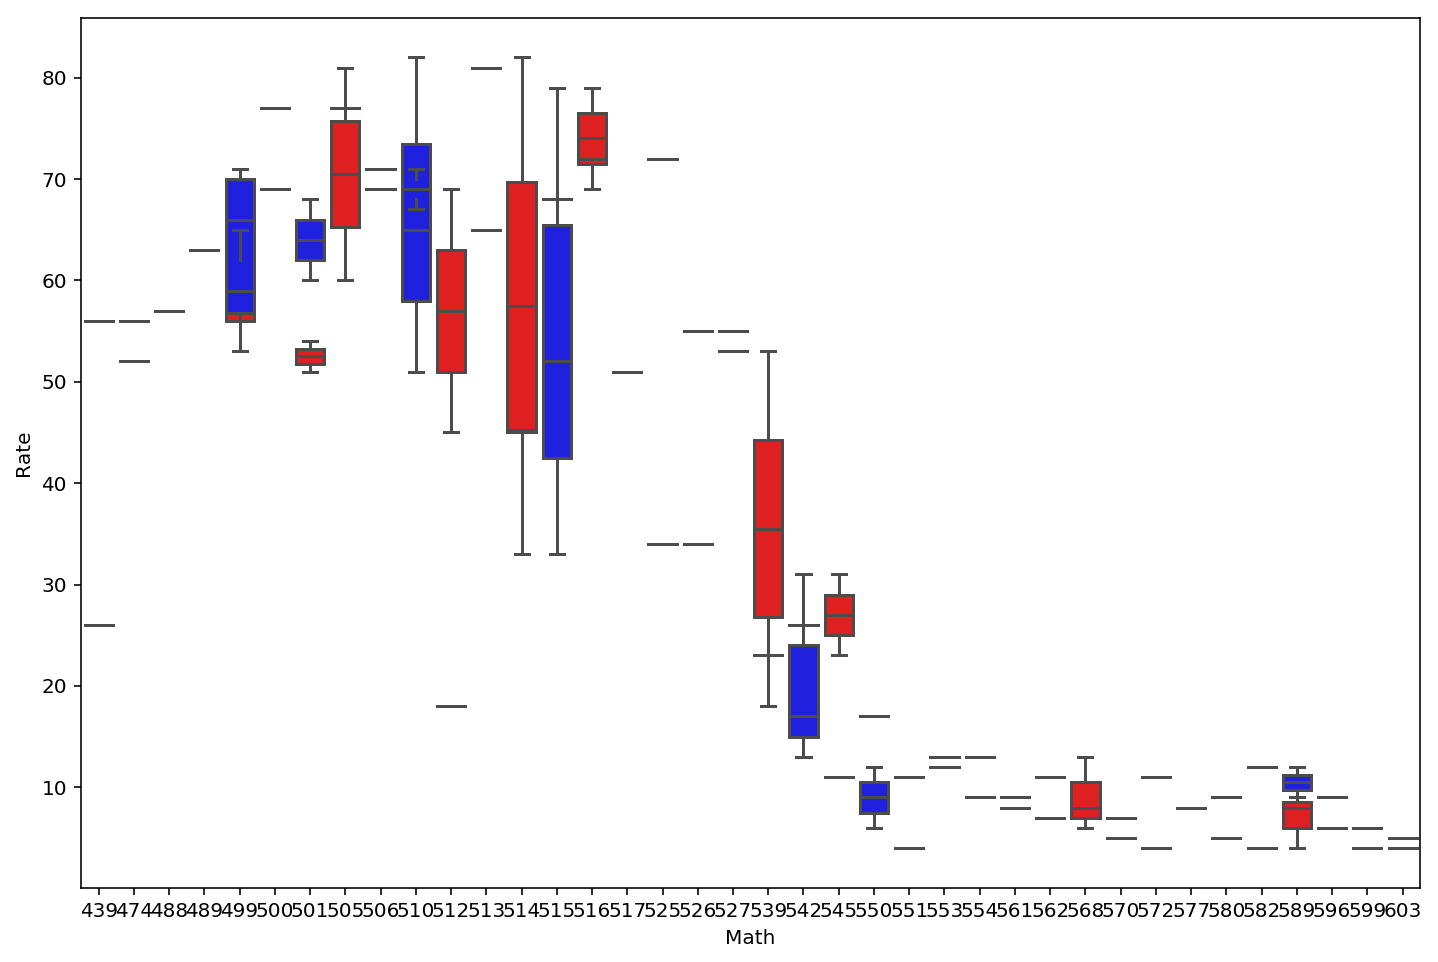

In [204]:
plt.figure(figsize=(12,8))
a = sns.boxplot(x=data_raw['Verbal'],y=data_raw['Rate'],whis=1,color='red')
b = sns.boxplot(x=data_raw['Math'],y=data_raw['Rate'],whis=1,color='blue')

# a.plot(figsize=(12,8))
# b.plot(figsize=(12,8))

In [18]:
# new_sat_stand = (new_sat - new_sat.mean()) / new_sat.std()
# print np.mean(new_sat_stand), np.std(new_sat_stand)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [19]:
import numpy as np
avg_vscore = data_raw[['State']].loc[data_raw['Verbal']>np.mean(data_raw['Verbal'])]
np.mean(data_raw['Verbal'])

532.0192307692307

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
data_raw[['State']].loc[data_raw['Verbal']>np.median(data_raw['Verbal'])]
np.median(data_raw['Verbal'])

526.5

More states are included in median list than mean list.
Distribution might be positively skewed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
data_raw['Difference']= data_raw['Verbal']-data_raw['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
data_df1 = data_raw.sort_values('Difference',ascending=False).head(10)
data_df2 = data_raw.sort_values('Difference').head(10)

display (data_df1.head(3),data_df2.head(3))

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [23]:
data_edited = data_raw.drop('State',axis=1,)

In [24]:
data_edited1 = data_edited.drop(data_edited.index[-1])

In [25]:
data_edited1

,Rate,Verbal,Math,Difference
0,82,509,510,-1
1,81,499,513,-14
2,79,511,515,-4
3,77,495,505,-10
4,72,520,516,4
5,71,501,499,2
6,71,500,499,1
7,69,511,506,5
8,69,506,500,6
9,68,510,501,9


In [27]:
data_corr = data_edited1.corr()

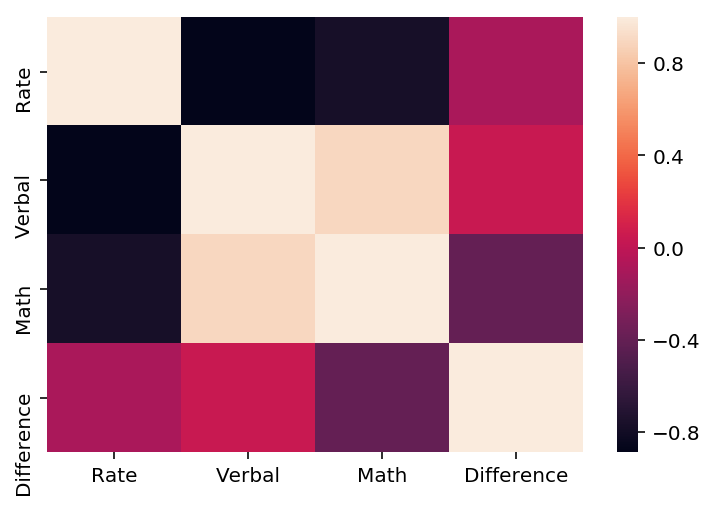

In [28]:
sns.heatmap(data_corr)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
data_edited1.describe()


,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


### Shaun's comment
Average score of both Verbal and Math are 532 and 531 respectively with a rough standard deviation of 33 and 36 marks respectively. On average there's not much difference in scores between Verbal and Math.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
data_cov = data_edited1.cov()
data_cov

,Rate,Verbal,Math,Difference
Rate,759.04,-816.280000,-773.220000,-43.060000
Verbal,-816.28,1112.934118,1089.404706,23.529412
Math,-773.22,1089.404706,1316.774902,-227.370196
Difference,-43.06,23.529412,-227.370196,250.899608


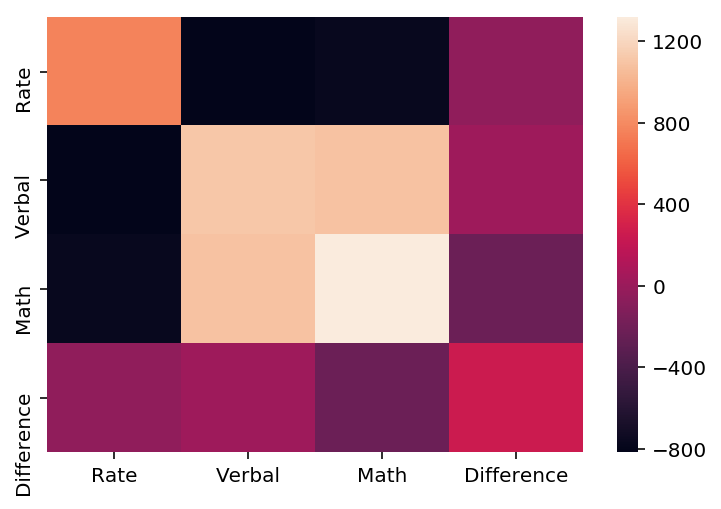

In [31]:
sns.heatmap(data_cov)

### Shaun's Comment
Q1: Covariance indicate how the variable 'move' or 'change direction' when one variable change.
Correlation indicates if one variable change, how much will the other variable will change.

Q2: Multiply by the population size or sampel size -1

Q3: It is easier to explain correlation as it is usually quantifiable. eg. y = mx

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

### Comments on the durgs dataset
I cleaned the data w/o using pandas because I answered the first portion of the project using this dataset instead of the SAT dataset. Some of the entries in the columns have '-' entires, thus '-' entries are converted to NaN as float types are able to recognise NaN format and NaN format are excluded in the descriptive stats (I think). Lastly for consistency, I have change the age range in the last few columns to reflect the larger age in the age range 

In [32]:
drug_raw = ''
drug_file = 'drug-use-by-age.csv'
with open (drug_file,'r') as f:
    drug_raw = f.read()
f.close()

In [33]:
drug_data = drug_raw.split('\r')
drug_lst = [(col.split(',')) for col in drug_data]

# clean column names and append into a list
drug_header=[(col_name.replace('-','_')) for col_name in drug_lst[0]]

# clean all other data and append into a list
drug_rest = drug_lst[1:]
drug_clean=[]
for data_list in drug_rest:
    temp=[]
    for data in data_list:
        if data == '-':
            temp.append(float((data.replace('-', 'NaN'))))
        elif data.find('-')!=-1:
            temp.append(float(data[3:]))
#             a.append((data.replace(data,'test')))
        elif data.find('+')!=-1:
            temp.append(float(data[:-1]))
        else:
            temp.append(float(data))
    drug_clean.append(temp)

In [34]:
drug_dict = {}
for index,value in enumerate(drug_header):
    temp=[]
    for age_grp in drug_clean:
        temp.append(age_grp[index])
    drug_dict[value] = temp

In [35]:
drug_df = pd.DataFrame(drug_dict)
drug_df.describe()

,age,alcohol_frequency,alcohol_use,cocaine_frequency,cocaine_use,crack_frequency,crack_use,hallucinogen_frequency,hallucinogen_use,heroin_frequency,...,oxycontin_frequency,oxycontin_use,pain_releiver_frequency,pain_releiver_use,sedative_frequency,sedative_use,stimulant_frequency,stimulant_use,tranquilizer_frequency,tranquilizer_use
count,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,17.000000,17.000000,16.000000,...,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,26.705882,33.352941,55.429412,7.875000,2.176471,15.035714,0.294118,8.411765,3.394118,73.281250,...,14.812500,0.935294,14.705882,6.270588,19.382353,0.282353,31.147059,1.917647,11.735294,2.805882
std,16.869961,21.318833,26.878866,8.038449,1.816772,18.111263,0.235772,15.000245,2.792506,70.090173,...,12.798275,0.608216,6.935098,3.166379,24.833527,0.138000,85.973790,1.407673,11.485205,1.753379
min,12.000000,3.000000,3.900000,1.000000,0.000000,1.000000,0.000000,2.000000,0.100000,1.000000,...,3.000000,0.000000,7.000000,0.600000,3.000000,0.000000,2.000000,0.000000,4.500000,0.200000
25%,16.000000,10.000000,40.100000,5.000000,0.500000,5.000000,0.000000,3.000000,0.600000,39.625000,...,5.750000,0.400000,12.000000,3.900000,6.500000,0.200000,7.000000,0.600000,6.000000,1.400000
50%,20.000000,48.000000,64.600000,5.250000,2.000000,7.750000,0.400000,3.000000,3.200000,53.750000,...,12.000000,1.100000,12.000000,6.200000,10.000000,0.300000,10.000000,1.800000,10.000000,3.500000
75%,29.000000,52.000000,77.500000,7.250000,4.000000,16.500000,0.500000,4.000000,5.200000,71.875000,...,18.125000,1.400000,15.000000,9.000000,17.500000,0.400000,12.000000,3.000000,11.000000,4.200000
max,65.000000,52.000000,84.200000,36.000000,4.900000,62.000000,0.600000,52.000000,8.600000,280.000000,...,46.000000,1.700000,36.000000,10.000000,104.000000,0.500000,364.000000,4.100000,52.000000,5.400000


In [51]:
drug_edited = drug_df.drop('n',axis=1)
drug_edited = drug_edited.set_index('age')
drug_edited

,alcohol_frequency,alcohol_use,cocaine_frequency,cocaine_use,crack_frequency,crack_use,hallucinogen_frequency,hallucinogen_use,heroin_frequency,heroin_use,...,oxycontin_frequency,oxycontin_use,pain_releiver_frequency,pain_releiver_use,sedative_frequency,sedative_use,stimulant_frequency,stimulant_use,tranquilizer_frequency,tranquilizer_use
age,,,,,,,,,,,,,,,,,,,,,
12.0,3.0,3.9,5.0,0.1,NaN,0.0,52.0,0.2,35.5,0.1,...,24.5,0.1,36.0,2.0,13.0,0.2,2.0,0.2,52.0,0.2
13.0,6.0,8.5,1.0,0.1,3.0,0.0,6.0,0.6,NaN,0.0,...,41.0,0.1,14.0,2.4,19.0,0.1,4.0,0.3,25.5,0.3
14.0,5.0,18.1,5.5,0.1,NaN,0.0,3.0,1.6,2.0,0.1,...,4.5,0.4,12.0,3.9,16.5,0.2,12.0,0.8,5.0,0.9
15.0,6.0,29.2,4.0,0.5,9.5,0.1,4.0,2.1,1.0,0.2,...,3.0,0.8,10.0,5.5,30.0,0.4,6.0,1.5,4.5,2.0
16.0,10.0,40.1,7.0,1.0,1.0,0.0,3.0,3.4,66.5,0.1,...,4.0,1.1,7.0,6.2,3.0,0.2,9.5,1.8,11.0,2.4
17.0,13.0,49.3,5.0,2.0,21.0,0.1,3.0,4.8,64.0,0.1,...,6.0,1.4,9.0,8.5,6.5,0.5,9.0,2.8,7.0,3.5
18.0,24.0,58.7,5.0,3.2,10.0,0.4,4.0,7.0,46.0,0.4,...,7.0,1.7,12.0,9.2,10.0,0.4,8.0,3.0,12.0,4.9
19.0,36.0,64.6,5.5,4.1,2.0,0.5,3.0,8.6,180.0,0.5,...,7.5,1.5,12.0,9.4,6.0,0.3,6.0,3.3,4.5,4.2
20.0,48.0,69.7,8.0,4.9,5.0,0.6,2.0,7.4,45.0,0.9,...,12.0,1.7,10.0,10.0,4.0,0.5,12.0,4.0,10.0,5.4


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [37]:
import matplotlib.pyplot as plt

In [52]:
drug_frequency = drug_edited.filter(like='frequency',axis=1)
drug_frequency.describe()

,alcohol_frequency,cocaine_frequency,crack_frequency,hallucinogen_frequency,heroin_frequency,inhalant_frequency,marijuana_frequency,meth_frequency,oxycontin_frequency,pain_releiver_frequency,sedative_frequency,stimulant_frequency,tranquilizer_frequency
count,17.000000,16.000000,14.000000,17.000000,16.000000,16.000000,17.000000,15.000000,16.000000,17.000000,17.000000,17.000000,17.000000
mean,33.352941,7.875000,15.035714,8.411765,73.281250,6.156250,42.941176,35.966667,14.812500,14.705882,19.382353,31.147059,11.735294
std,21.318833,8.038449,18.111263,15.000245,70.090173,4.860448,18.362566,31.974581,12.798275,6.935098,24.833527,85.973790,11.485205
min,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,4.000000,2.000000,3.000000,7.000000,3.000000,2.000000,4.500000
25%,10.000000,5.000000,5.000000,3.000000,39.625000,3.375000,30.000000,12.000000,5.750000,12.000000,6.500000,7.000000,6.000000
50%,48.000000,5.250000,7.750000,3.000000,53.750000,4.000000,52.000000,30.000000,12.000000,12.000000,10.000000,10.000000,10.000000
75%,52.000000,7.250000,16.500000,4.000000,71.875000,6.625000,52.000000,47.000000,18.125000,15.000000,17.500000,12.000000,11.000000
max,52.000000,36.000000,62.000000,52.000000,280.000000,19.000000,72.000000,105.000000,46.000000,36.000000,104.000000,364.000000,52.000000


In [53]:
drug_use = drug_edited.filter(like='use',axis=1)
drug_use.describe()

,alcohol_use,cocaine_use,crack_use,hallucinogen_use,heroin_use,inhalant_use,marijuana_use,meth_use,oxycontin_use,pain_releiver_use,sedative_use,stimulant_use,tranquilizer_use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,55.429412,2.176471,0.294118,3.394118,0.352941,1.388235,18.923529,0.382353,0.935294,6.270588,0.282353,1.917647,2.805882
std,26.878866,1.816772,0.235772,2.792506,0.333762,0.927283,11.959752,0.262762,0.608216,3.166379,0.138000,1.407673,1.753379
min,3.900000,0.000000,0.000000,0.100000,0.000000,0.000000,1.100000,0.000000,0.000000,0.600000,0.000000,0.000000,0.200000
25%,40.100000,0.500000,0.000000,0.600000,0.100000,0.600000,8.700000,0.200000,0.400000,3.900000,0.200000,0.600000,1.400000
50%,64.600000,2.000000,0.400000,3.200000,0.200000,1.400000,20.800000,0.400000,1.100000,6.200000,0.300000,1.800000,3.500000
75%,77.500000,4.000000,0.500000,5.200000,0.600000,2.000000,28.400000,0.600000,1.400000,9.000000,0.400000,3.000000,4.200000
max,84.200000,4.900000,0.600000,8.600000,1.100000,3.000000,34.000000,0.900000,1.700000,10.000000,0.500000,4.100000,5.400000


In [55]:
drug_heatmap = drug_edited

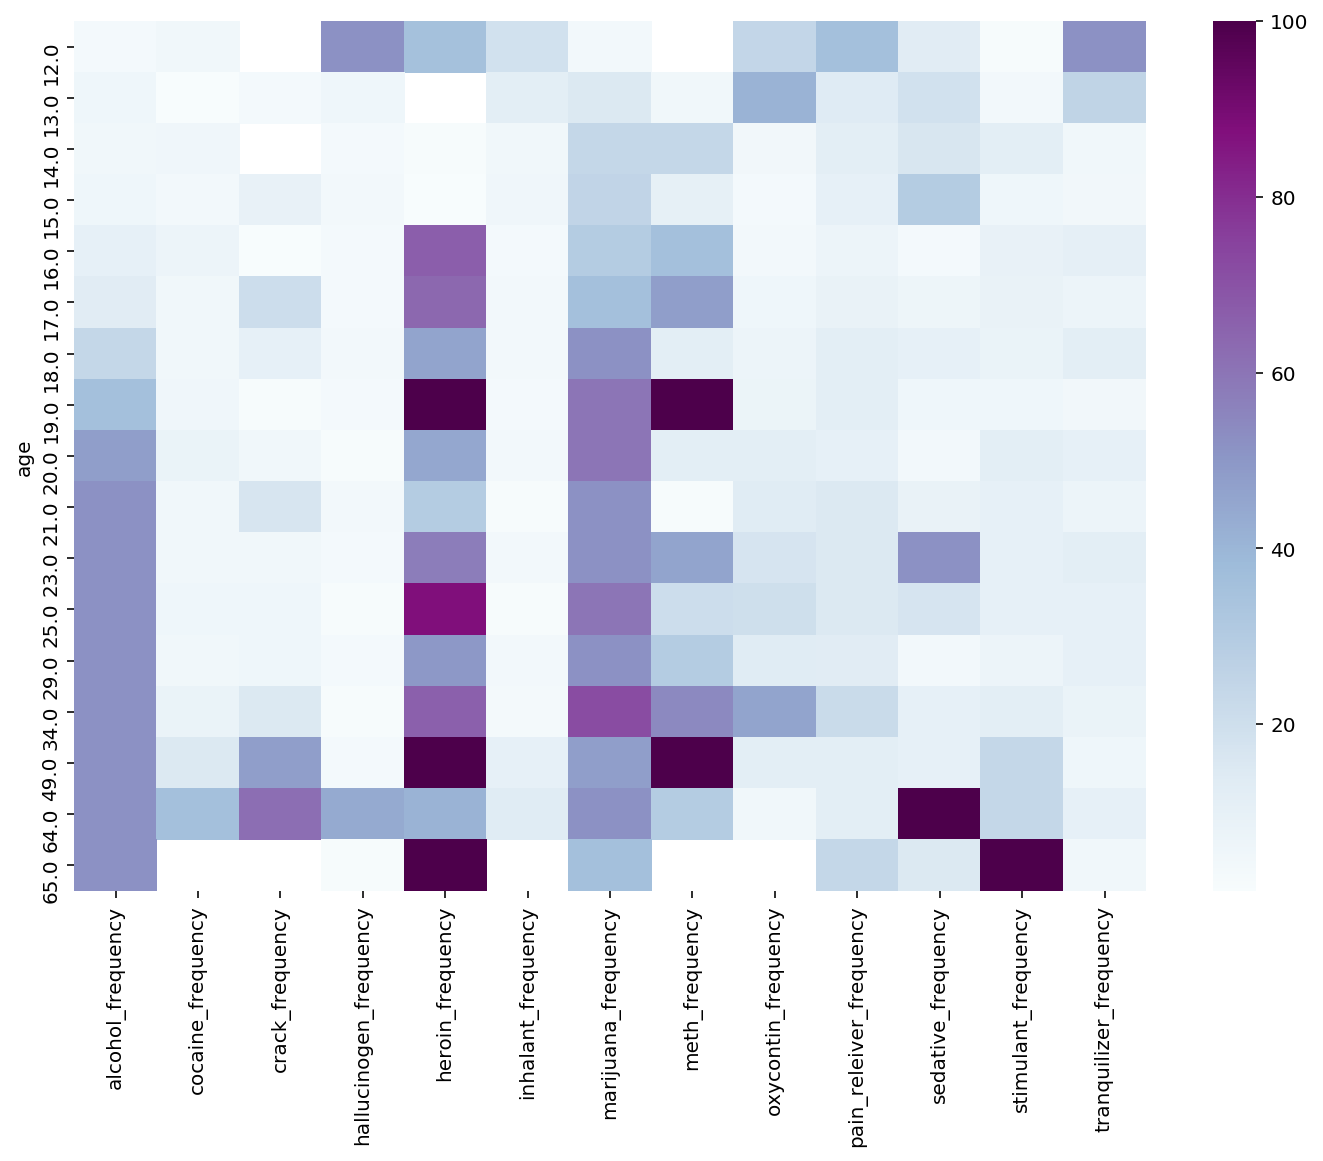

In [56]:
drug_heatmap_freq = drug_heatmap.filter(like='frequency',axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(drug_heatmap_freq,vmax=100,cmap='BuPu')

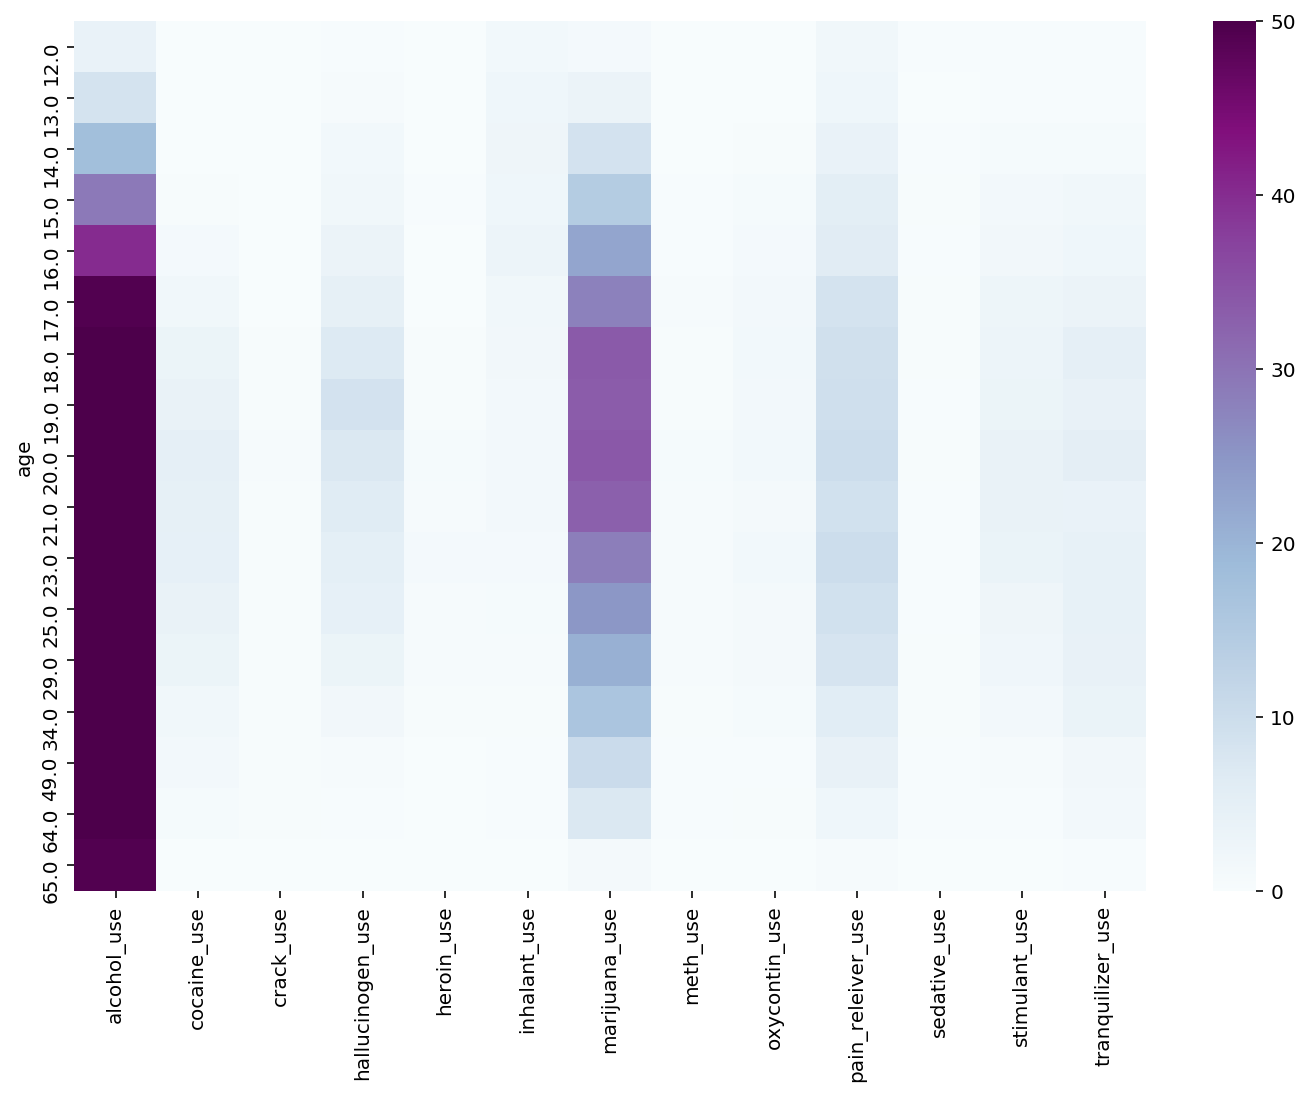

In [49]:
drug_heatmap_use = drug_heatmap.filter(like='use',axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(drug_heatmap_use,vmax=50,cmap='BuPu')

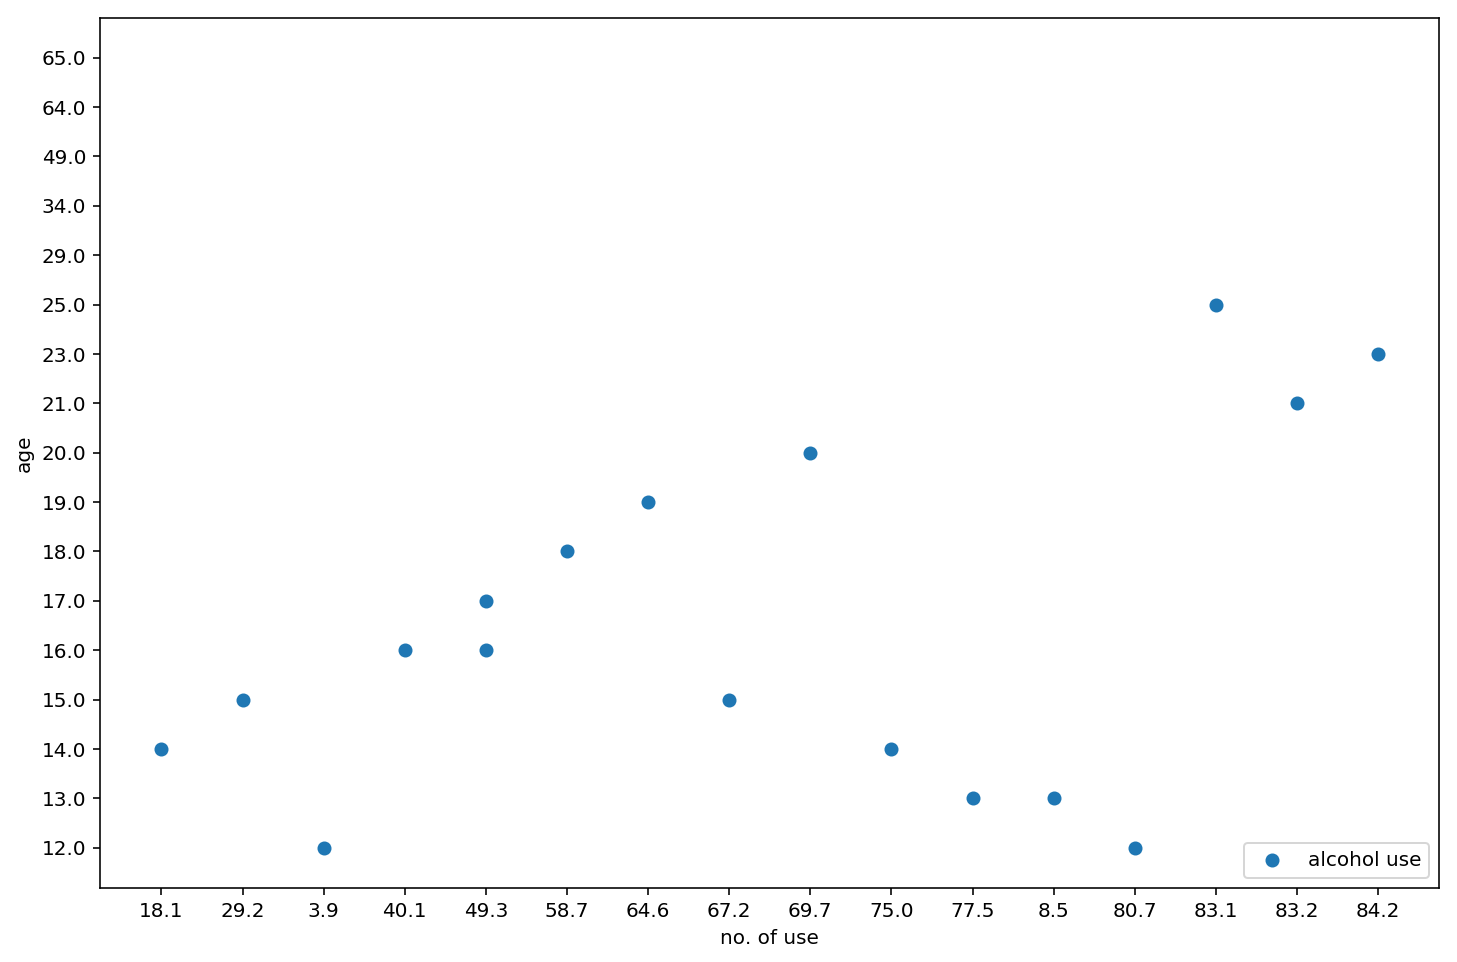

In [159]:
plt.figure(figsize=(12, 8))
plt.scatter(x=(drug_df.filter(like='alcohol_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='alcohol use')
# plt.scatter(x=(drug_df.filter(like='cocaine_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='cocaine_use')
# plt.scatter(x=(drug_df.filter(like='crack_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='crack_use')
# plt.scatter(x=(drug_df.filter(like='hallucinogen_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='hallucinogen_use')
# plt.scatter(x=(drug_df.filter(like='heroin_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='heroin_use')
# plt.scatter(x=(drug_df.filter(like='inhalant_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='inhalant_use')
# plt.scatter(x=(drug_df.filter(like='marijuana_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='marijuana_use')
# plt.scatter(x=(drug_df.filter(like='meth_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='meth_use')
# plt.scatter(x=(drug_df.filter(like='oxycontin_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='oxycontin_use')
# plt.scatter(x=(drug_df.filter(like='pain_releiver_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='pain_releiver_use')
# plt.scatter(x=(drug_df.filter(like='sedative_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='sedative_use')
# plt.scatter(x=(drug_df.filter(like='stimulant_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='stimulant_use')
# plt.scatter(x=(drug_df.filter(like='tranquilizer_use',axis=1)),y=(drug_df.filter(like='age',axis=1)),label='tranquilizer_use')
plt.ylabel('age')
plt.xlabel('no. of use')
plt.legend(loc='lower right')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
1. To investigate if there's any corelation between drug type frequency. Main focus will be any durg combination with correlation above 0.8
2. To investigate if there's any corelation between drug type use. Main focus will be any durg combination with correlation above 0.8
...

In [197]:
# Code
drug_corr1 = drug_edited.filter(like='frequency',axis=1).corr()
drug_corr1

,alcohol_frequency,cocaine_frequency,crack_frequency,hallucinogen_frequency,heroin_frequency,inhalant_frequency,marijuana_frequency,meth_frequency,oxycontin_frequency,pain_releiver_frequency,sedative_frequency,stimulant_frequency,tranquilizer_frequency
alcohol_frequency,1.000000,0.391981,0.333935,-0.174622,0.381874,-0.305296,0.818769,0.253725,0.119852,0.007087,0.201423,0.260304,-0.415026
cocaine_frequency,0.391981,1.000000,0.875558,0.529790,0.149018,0.369098,0.250348,0.172758,-0.236768,-0.107033,0.773808,0.817772,-0.144951
crack_frequency,0.333935,0.875558,1.000000,0.737179,0.298192,0.665838,0.113860,0.261224,-0.195650,-0.001609,0.611218,0.903993,-0.233501
hallucinogen_frequency,-0.174622,0.529790,0.737179,1.000000,-0.205455,0.846213,-0.380430,-0.084470,0.032624,0.547363,0.533095,-0.103980,0.705734
heroin_frequency,0.381874,0.149018,0.298192,-0.205455,1.000000,0.048409,0.277175,0.873618,0.039502,-0.041496,-0.199142,0.204941,-0.202417
inhalant_frequency,-0.305296,0.369098,0.665838,0.846213,0.048409,1.000000,-0.598028,0.045934,0.226635,0.587035,0.380819,0.083121,0.764857
marijuana_frequency,0.818769,0.250348,0.113860,-0.380430,0.277175,-0.598028,1.000000,0.317099,0.040880,-0.285292,0.048777,-0.069454,-0.591449
meth_frequency,0.253725,0.172758,0.261224,-0.084470,0.873618,0.045934,0.317099,1.000000,-0.053704,0.037693,-0.103219,0.344898,-0.404670
oxycontin_frequency,0.119852,-0.236768,-0.195650,0.032624,0.039502,0.226635,0.040880,-0.053704,1.000000,0.561735,-0.131597,-0.228278,0.412133
pain_releiver_frequency,0.007087,-0.107033,-0.001609,0.547363,-0.041496,0.587035,-0.285292,0.037693,0.561735,1.000000,-0.045213,0.324717,0.699282


In [198]:
drug_corr2 = drug_edited.filter(like='use',axis=1).corr()
drug_corr2

,alcohol_use,cocaine_use,crack_use,hallucinogen_use,heroin_use,inhalant_use,marijuana_use,meth_use,oxycontin_use,pain_releiver_use,sedative_use,stimulant_use,tranquilizer_use
alcohol_use,1.000000,0.773458,0.877378,0.463702,0.677614,-0.648248,0.594165,0.682531,0.589219,0.617523,0.318268,0.582241,0.735785
cocaine_use,0.773458,1.000000,0.835727,0.855668,0.899944,-0.214609,0.883789,0.889353,0.865626,0.906638,0.461914,0.923954,0.920430
crack_use,0.877378,0.835727,1.000000,0.556222,0.750790,-0.543499,0.620670,0.694324,0.603003,0.652764,0.438421,0.618008,0.772651
hallucinogen_use,0.463702,0.855668,0.556222,1.000000,0.683674,0.173030,0.959353,0.780071,0.916777,0.909333,0.518700,0.940008,0.862900
heroin_use,0.677614,0.899944,0.750790,0.683674,1.000000,-0.215961,0.711613,0.816620,0.775321,0.805868,0.333649,0.808024,0.818583
inhalant_use,-0.648248,-0.214609,-0.543499,0.173030,-0.215961,1.000000,0.127336,-0.059903,0.110492,0.092045,0.110611,0.108381,-0.103745
marijuana_use,0.594165,0.883789,0.620670,0.959353,0.711613,0.127336,1.000000,0.870446,0.971733,0.966226,0.616766,0.968096,0.935199
meth_use,0.682531,0.889353,0.694324,0.780071,0.816620,-0.059903,0.870446,1.000000,0.895790,0.918051,0.663079,0.894757,0.936270
oxycontin_use,0.589219,0.865626,0.603003,0.916777,0.775321,0.110492,0.971733,0.895790,1.000000,0.976445,0.625929,0.947492,0.955081
pain_releiver_use,0.617523,0.906638,0.652764,0.909333,0.805868,0.092045,0.966226,0.918051,0.976445,1.000000,0.636666,0.961484,0.959283


In [195]:
a=[]
for drug in drug_corr1:
    a.append(drug_corr1.loc[drug_corr1[drug]>0.8][drug])
pd.DataFrame(a)

,alcohol_frequency,cocaine_frequency,crack_frequency,hallucinogen_frequency,heroin_frequency,inhalant_frequency,marijuana_frequency,meth_frequency,oxycontin_frequency,pain_releiver_frequency,sedative_frequency,stimulant_frequency,tranquilizer_frequency
alcohol_frequency,1.000000,NaN,NaN,NaN,NaN,NaN,0.818769,NaN,NaN,NaN,NaN,NaN,NaN
cocaine_frequency,NaN,1.000000,0.875558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.817772,NaN
crack_frequency,NaN,0.875558,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903993,NaN
hallucinogen_frequency,NaN,NaN,NaN,1.000000,NaN,0.846213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heroin_frequency,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.873618,NaN,NaN,NaN,NaN,NaN
inhalant_frequency,NaN,NaN,NaN,0.846213,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marijuana_frequency,0.818769,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
meth_frequency,NaN,NaN,NaN,NaN,0.873618,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
oxycontin_frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
pain_releiver_frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


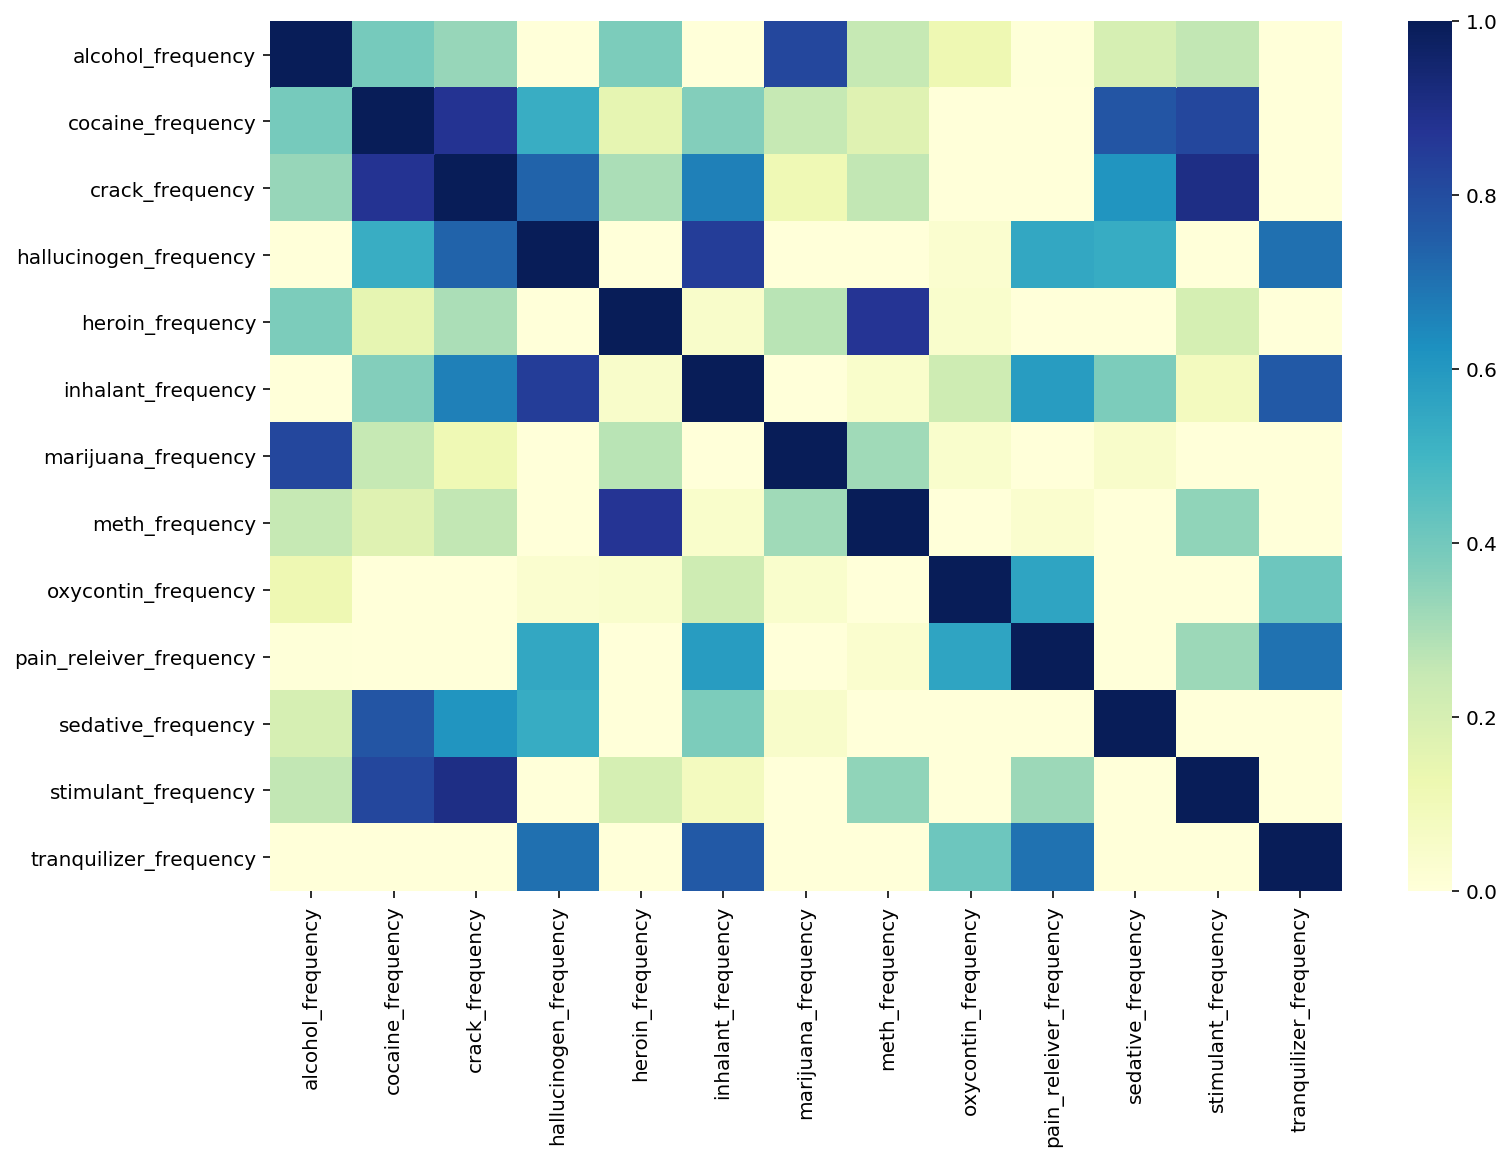

In [201]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_corr1,cmap='YlGnBu',vmin=0,vmax=1)

In [179]:
drug_corr.loc[drug_corr['alcohol_frequency']>0.8]['alcohol_frequency']

alcohol_frequency      1.000000
marijuana_frequency    0.818769
Name: alcohol_frequency, dtype: float64

In [199]:
b=[]
for drug in drug_corr2:
    b.append(drug_corr2.loc[drug_corr2[drug]>0.8][drug])
pd.DataFrame(b)

,alcohol_use,cocaine_use,crack_use,hallucinogen_use,heroin_use,inhalant_use,marijuana_use,meth_use,oxycontin_use,pain_releiver_use,sedative_use,stimulant_use,tranquilizer_use
alcohol_use,1.000000,NaN,0.877378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cocaine_use,NaN,1.000000,0.835727,0.855668,0.899944,NaN,0.883789,0.889353,0.865626,0.906638,NaN,0.923954,0.920430
crack_use,0.877378,0.835727,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hallucinogen_use,NaN,0.855668,NaN,1.000000,NaN,NaN,0.959353,NaN,0.916777,0.909333,NaN,0.940008,0.862900
heroin_use,NaN,0.899944,NaN,NaN,1.000000,NaN,NaN,0.816620,NaN,0.805868,NaN,0.808024,0.818583
inhalant_use,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marijuana_use,NaN,0.883789,NaN,0.959353,NaN,NaN,1.000000,0.870446,0.971733,0.966226,NaN,0.968096,0.935199
meth_use,NaN,0.889353,NaN,NaN,0.816620,NaN,0.870446,1.000000,0.895790,0.918051,NaN,0.894757,0.936270
oxycontin_use,NaN,0.865626,NaN,0.916777,NaN,NaN,0.971733,0.895790,1.000000,0.976445,NaN,0.947492,0.955081
pain_releiver_use,NaN,0.906638,NaN,0.909333,0.805868,NaN,0.966226,0.918051,0.976445,1.000000,NaN,0.961484,0.959283


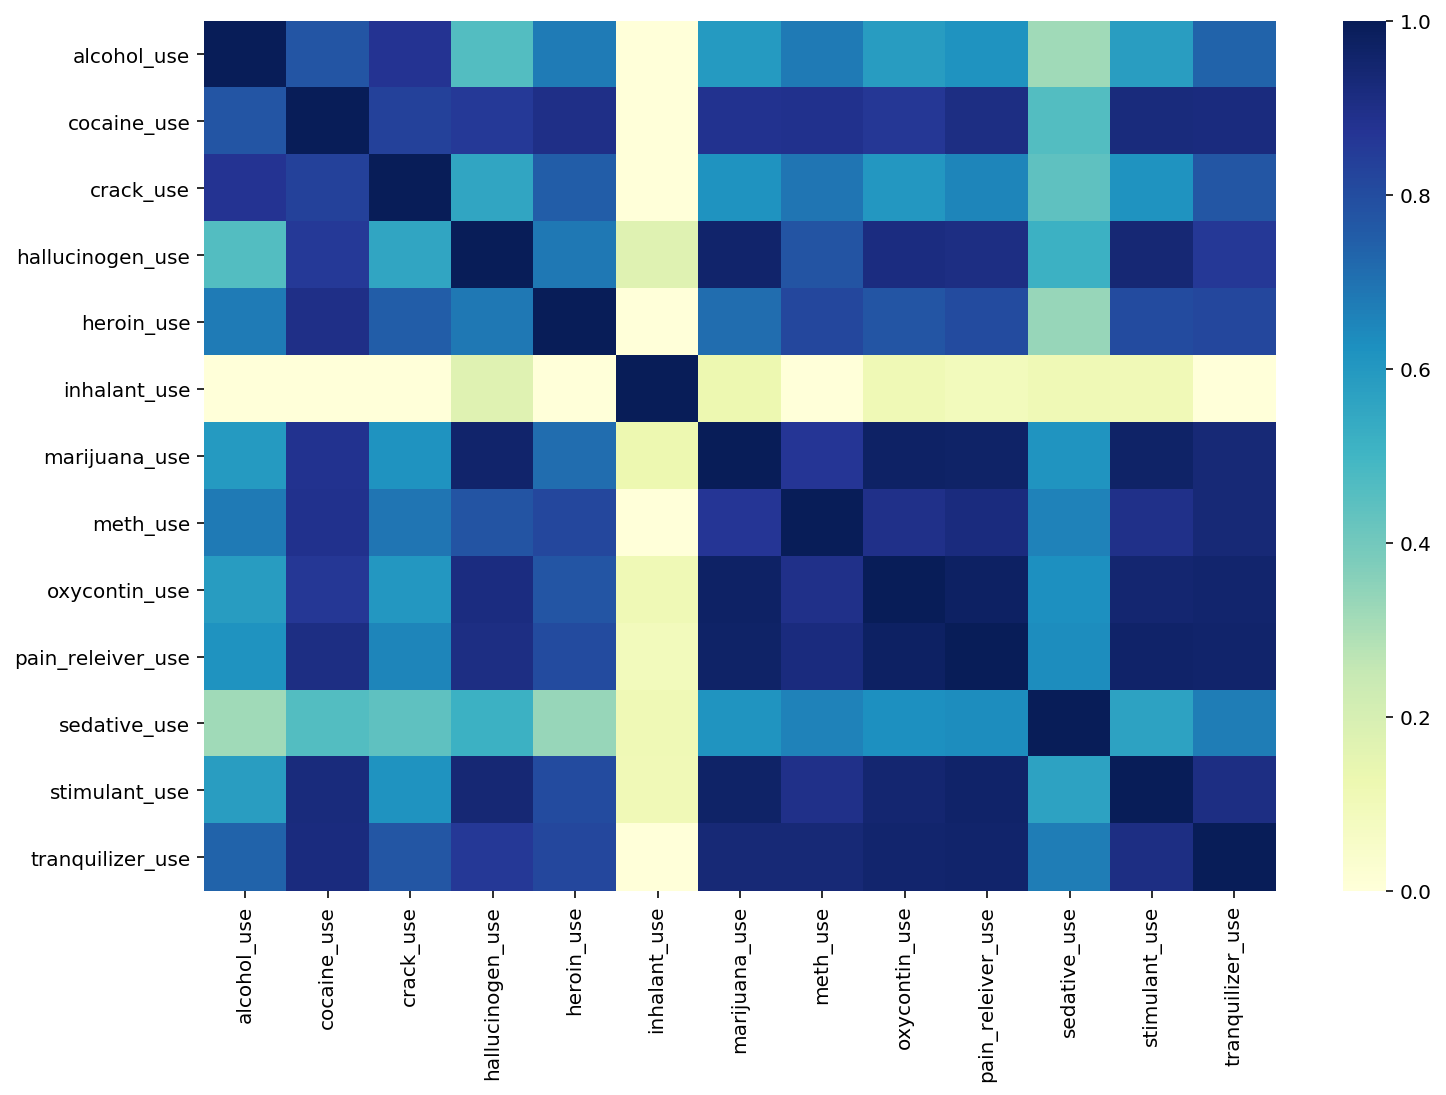

In [203]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_corr2,cmap='YlGnBu',vmin=0,vmax=1)

**Report**
1. From heatmap and correlation matrix on drug-drug frequency, can observed that alcohol-marijuana, cocaine-crack, cocaine-stimulant, crack-stimulant,inhalant-hallucinogen, heroin-meth have high correlation factor
2. With regards to drug-drug use, correlation matrix do not indicate any significant observations as most have very high correlation factor between each other. Indicator might not indicate anything about if drug A is use drug B will also be used.

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [206]:
data_edited1[['Rate']]

,Rate
0,82
1,81
2,79
3,77
4,72
5,71
6,71
7,69
8,69
9,68


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### Q1

In [215]:
stats.spearmanr(data_edited1['Verbal'],data_edited1['Math'])

SpearmanrResult(correlation=0.9094125143903472, pvalue=2.6565430361616923e-20)

In [216]:
stats.pearsonr(data_edited1['Verbal'],data_edited1['Math'])

(0.8999093181811048, 2.735579353543464e-19)

### Q2

The Pearson correlation evaluates the linear relationship between two continuous variables where a proportional change is expected.

Spearman rank-order correlation
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### Q1 & Q2

In [251]:
a=[]
for num in range(101):
    a.append(np.percentile(data_edited1['Rate'],num))
pd.Series(a).to_frame('Rate')

,Rate
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
5,4.5
6,5.0
7,5.0
8,5.0
9,5.5


### Q3: Shaun's Comment
Now the Rate becomes ranked by percentile

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### Shaun's Comment
Q1: Percentile will indicate the range of data that you will need to be concerned with to ensure data is not to -VE or +VE skewed due to outliers as mean and median tend to 'hide' the outliers. Identifying the 25th and 75th percentile will be a good start to identify any outliers that is out of this range.